In [1]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

In [3]:
# Hyperparameters
input_features = 28*28  # (MNIST Imaages shape)
hidden_features = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

### Loading MNIST dataset

In [4]:
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 9601763.15it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2138657.40it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12531717.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9132564.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

**sample** contains 100 data samples because batch size=100. Each datapoint is 1 x 28 x 28 because only 1 channel is present.

**labels**  contains 100 elements.

In [6]:
dataiter = iter(train_loader)
samples, labels = next(dataiter)

print(np.array(samples).shape)
print(np.array(labels).shape)
print("No. of iterations/No. of Batches = ",len(train_loader)) # Total Images/Batch_size = 60,000/100 = 600

(100, 1, 28, 28)
(100,)
No. of iterations/No. of Batches =  600


### Visualizing data

1st 6 images are(Changes everytime) = tensor([6, 7, 0, 0, 6, 7])


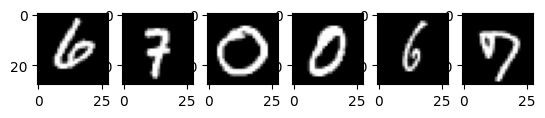

In [7]:
print(f"1st 6 images are(Changes everytime) = {labels[:6]}")

for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

### Model

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, hidden_features, num_classes=10):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(in_features=input_features, out_features=hidden_features)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden_features, out_features=num_classes)

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.relu(out1)
        out3 = self.linear2(out2)
        return out3

images shape is **(100, 1, 28, 28)**. But model expects it in shape **(100, 784)**. So, we have to reshape the data.

In [9]:
model = NeuralNetwork(input_features=input_features, hidden_features=hidden_features, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train loop
# This denotes the number of batches
n_total_steps = len(train_loader)

for epoch in range(1, num_epochs+1):
    for step, (images, labels) in enumerate(train_loader):
        # Reshaping data
       images = images.reshape(-1, images.shape[2]*images.shape[3]).to(device) # Shape => (100, 784)
       labels = labels.to(device) # Shape => (100)

       # Forward Pass
       outputs = model(images)
       loss = criterion(outputs, labels)

       # Backward pass
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       # Getting Accuracy
       _, preds = torch.max(input=outputs, dim=1)
       tot_correct_pred = (labels==preds).sum().item()
       acc = tot_correct_pred/labels.shape[0]

       if (step+1)%100==0:
        print(f"Epoch {epoch}/{num_epochs}, Step {step+1}/{n_total_steps}, Loss = {loss.item():.4f}, Accuracy = {acc:.4f}")


Epoch 1/2, Step 100/600, Loss = 0.5727, Accuracy = 0.8300
Epoch 1/2, Step 200/600, Loss = 0.2890, Accuracy = 0.9200
Epoch 1/2, Step 300/600, Loss = 0.3420, Accuracy = 0.8900
Epoch 1/2, Step 400/600, Loss = 0.3270, Accuracy = 0.9100
Epoch 1/2, Step 500/600, Loss = 0.1338, Accuracy = 0.9600
Epoch 1/2, Step 600/600, Loss = 0.1706, Accuracy = 0.9600
Epoch 2/2, Step 100/600, Loss = 0.2623, Accuracy = 0.9100
Epoch 2/2, Step 200/600, Loss = 0.2572, Accuracy = 0.9400
Epoch 2/2, Step 300/600, Loss = 0.2332, Accuracy = 0.9500
Epoch 2/2, Step 400/600, Loss = 0.1203, Accuracy = 0.9800
Epoch 2/2, Step 500/600, Loss = 0.2211, Accuracy = 0.9400
Epoch 2/2, Step 600/600, Loss = 0.1732, Accuracy = 0.9500


### Testing and Evaluation

In [10]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
       images = images.reshape(-1, images.shape[2]*images.shape[3]).to(device)
       labels = labels.to(device)

       outputs = model(images)
       _, predictions = torch.max(outputs, dim=1)
       n_samples += labels.shape[0]
       n_correct += (predictions==labels).sum().item()

    accuracy = 100.0*n_correct / n_samples
    print("Test Accuracy = ", accuracy)


Test Accuracy =  95.22
